# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to
    **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Python Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import matplotlib.image as mpimg
import random
from sklearn.utils import shuffle
from scipy import ndimage, misc
from math import pi
import copy
# from skimage import data
# from skimage.color import rgb2gray
import csv

import tensorflow as tf
# Tensorflow 1 compatibility
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.compat.v1.layers import flatten

# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Print data shapes
print("Training, Validation, and Testing datasets.")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Instructions for updating:
non-resource variables are not supported in the long term
Training, Validation, and Testing datasets.
X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
X_valid shape: (4410, 32, 32, 3)
y_valid shape: (4410,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

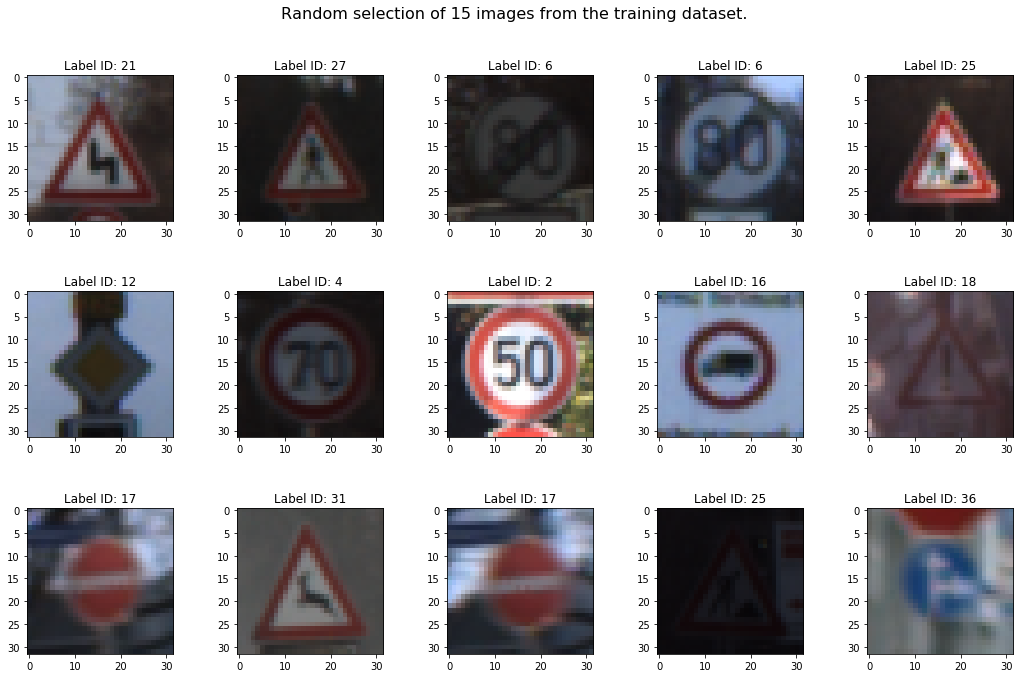

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Shuffle Images
X_train, y_train = shuffle(X_train, y_train)

# Visualizations will be shown in the notebook.
%matplotlib inline

# Plot 15 random images from the training set with accompanying labels.
fig, ax = plt.subplots(3, 5, figsize=(15, 10))
fig.tight_layout(pad=3.0)
fig.suptitle('Random selection of 15 images from the training dataset.', fontsize=16)
fig.subplots_adjust(top=0.90)
ax = ax.ravel()
for i in range(15):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    ax[i].imshow(image)
    ax[i].set_title('Label ID: ' + str(y_train[index]))

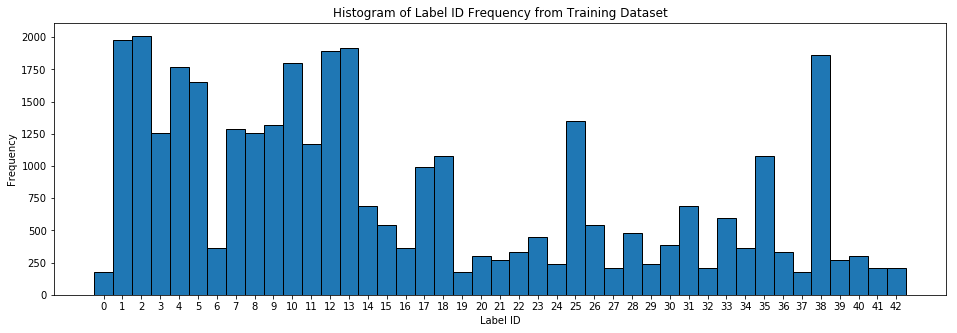

   LabelID	     Count
---------- 	 ----------
         0	       180
         1	      1980
         2	      2010
         3	      1260
         4	      1770
         5	      1650
         6	       360
         7	      1290
         8	      1260
         9	      1320
        10	      1800
        11	      1170
        12	      1890
        13	      1920
        14	       690
        15	       540
        16	       360
        17	       990
        18	      1080
        19	       180
        20	       300
        21	       270
        22	       330
        23	       450
        24	       240
        25	      1350
        26	       540
        27	       210
        28	       480
        29	       240
        30	       390
        31	       690
        32	       210
        33	       599
        34	       360
        35	      1080
        36	       330
        37	       180
        38	      1860
        39	       270
        40	       300
        41	       210
        42	       210


In [4]:
# histogram of label frequency
plt.figure(figsize=(16, 5))
n, bins, patches = plt.hist(y_train, bins=range(n_classes+1), histtype='bar', align='left', alpha=1, edgecolor='black')
locs, labels = xticks()
xticks(np.arange(np.min(y_train), np.max(y_train)+1, step=1))
plt.xlabel('Label ID')
plt.ylabel('Frequency')
plt.title('Histogram of Label ID Frequency from Training Dataset')
plt.show()

print("{:>10s}".format("LabelID") + "\t" + "{:>10s}".format("Count"))
print("----------", "\t", "----------")

for i in range(0, len(n)):
    print("{:>10d}".format(i) + "\t" + "{:>10d}".format(int(n[i])))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

X_train, y_train shapes BEFORE concatenating normalized images: (34799, 32, 32, 3) (34799,)
Adding 34799 images
X_train, y_train shapes AFTER concatenating normalized images: (69598, 32, 32, 3) (69598,)


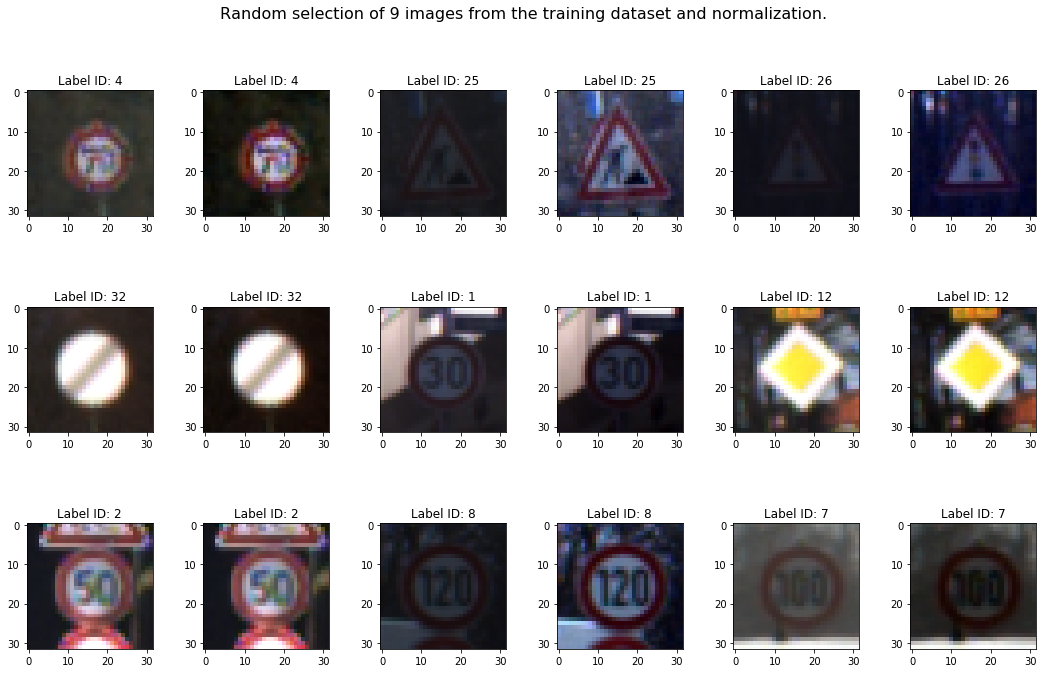

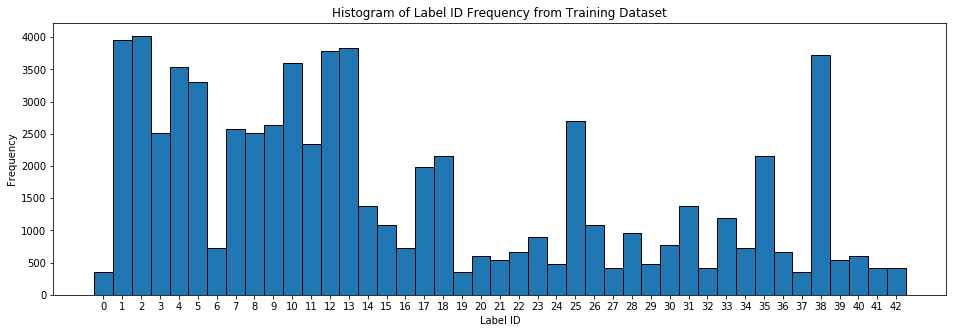

   LabelID	     Count
---------- 	 ----------
         0	       360
         1	      3960
         2	      4020
         3	      2520
         4	      3540
         5	      3300
         6	       720
         7	      2580
         8	      2520
         9	      2640
        10	      3600
        11	      2340
        12	      3780
        13	      3840
        14	      1380
        15	      1080
        16	       720
        17	      1980
        18	      2160
        19	       360
        20	       600
        21	       540
        22	       660
        23	       900
        24	       480
        25	      2700
        26	      1080
        27	       420
        28	       960
        29	       480
        30	       780
        31	      1380
        32	       420
        33	      1198
        34	       720
        35	      2160
        36	       660
        37	       360
        38	      3720
        39	       540
        40	       600
        41	       420
        42	       420


In [6]:
# Create set of normalized images.
def normalize_image(img):
    img_norm = np.zeros_like(img)
    img_norm = cv2.normalize(img, img_norm, 0, 255, cv2.NORM_MINMAX)
    
    return img_norm



X_train_norm = np.zeros_like(X_train)

for i in range (0, len(X_train_norm)):
    X_train_norm[i] = normalize_image(X_train[i])

# Plot 9 random images from the training set with accompanying labels.
fig, ax = plt.subplots(3, 6, figsize=(15, 10))
fig.tight_layout(pad=2.0)
fig.suptitle('Random selection of 9 images from the training dataset and normalization.', fontsize=16)
fig.subplots_adjust(top=0.90)
ax = ax.ravel()
for i in range(0, 18, 2):
    index = random.randint(0, len(X_train))
    img = X_train[index]
    img_norm = X_train_norm[index]
    ax[i].imshow(img)
    ax[i].set_title('Label ID: ' + str(y_train[index]))
    ax[i+1].imshow(img_norm)
    ax[i+1].set_title('Label ID: ' + str(y_train[index]))

print("X_train, y_train shapes BEFORE concatenating normalized images:", X_train.shape, y_train.shape)
print("Adding", len(X_train_norm), "images")

# Add normalized images to X_train dataset
X_train = np.concatenate((X_train, X_train_norm), axis=0)
y_train = np.concatenate((y_train, y_train), axis=0)
    
print("X_train, y_train shapes AFTER concatenating normalized images:", X_train.shape, y_train.shape)

#Clear arrays to free up memory
X_train_norm = []

# Updated histogram of label frequency
plt.figure(figsize=(16, 5))
n, bins, patches = plt.hist(y_train, bins=range(n_classes+1), histtype='bar', align='left', alpha=1, edgecolor='black')
locs, labels = xticks()
xticks(np.arange(np.min(y_train), np.max(y_train)+1, step=1))
plt.xlabel('Label ID')
plt.ylabel('Frequency')
plt.title('Histogram of Label ID Frequency from Training Dataset')
plt.show()

print("{:>10s}".format("LabelID") + "\t" + "{:>10s}".format("Count"))
print("----------", "\t", "----------")

for i in range(0, len(n)):
    print("{:>10d}".format(i) + "\t" + "{:>10d}".format(int(n[i])))

X_train, y_train shapes BEFORE concatenating darkened and brightened images: (69598, 32, 32, 3) (69598,)
Adding 139196 images
X_train, y_train shapes AFTER concatenating darkened and brightened images: (208794, 32, 32, 3) (208794,)


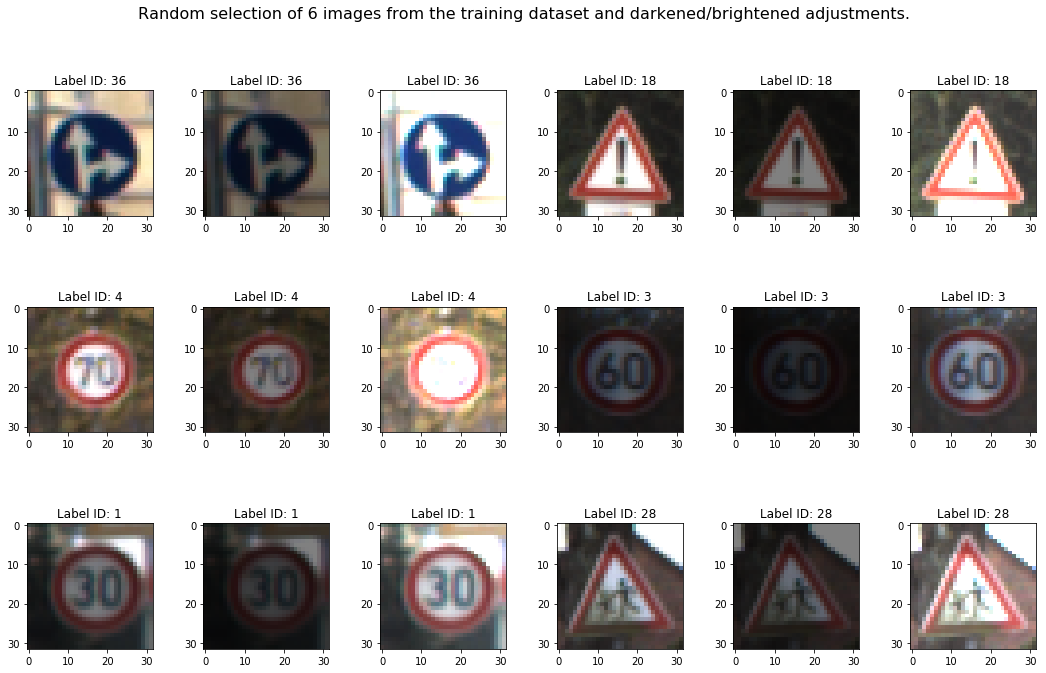

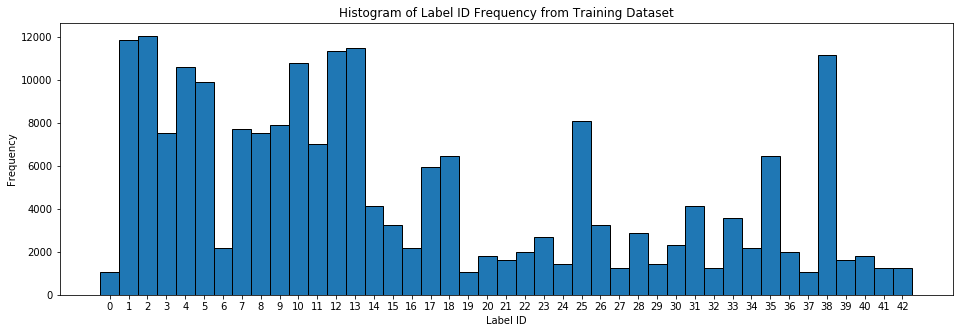

   LabelID	     Count
---------- 	 ----------
         0	      1080
         1	     11880
         2	     12060
         3	      7560
         4	     10620
         5	      9900
         6	      2160
         7	      7740
         8	      7560
         9	      7920
        10	     10800
        11	      7020
        12	     11340
        13	     11520
        14	      4140
        15	      3240
        16	      2160
        17	      5940
        18	      6480
        19	      1080
        20	      1800
        21	      1620
        22	      1980
        23	      2700
        24	      1440
        25	      8100
        26	      3240
        27	      1260
        28	      2880
        29	      1440
        30	      2340
        31	      4140
        32	      1260
        33	      3594
        34	      2160
        35	      6480
        36	      1980
        37	      1080
        38	     11160
        39	      1620
        40	      1800
        41	      1260
        42	      1260


In [7]:
def add_gaussian_noise(X_imgs, alpha, beta, gamma):
    gaussian_noise_imgs = []
    row, col, _ = X_imgs[0].shape
    # Gaussian distribution parameters
    mean = 0
    var = 0.1
    sigma = var ** 0.5
    
    for X_img in X_imgs:
        gaussian = np.random.random((row, col, 1)).astype(np.float32)
        gaussian = np.concatenate((gaussian, gaussian, gaussian), axis = 2)
        gaussian_img = cv2.addWeighted(X_img, alpha, 0.25 * gaussian, beta, gamma, dtype = cv2.CV_8U)
        gaussian_noise_imgs.append(gaussian_img)
        
    gaussian_noise_imgs = np.array(gaussian_noise_imgs, dtype=np.uint8)
    
    return gaussian_noise_imgs



X_train_gauss_darken = add_gaussian_noise(X_train, alpha=0.50, beta=0.25, gamma=0)
X_train_gauss_brighten = add_gaussian_noise(X_train, alpha=1.75, beta=0.25, gamma=10)
y_train_gauss = np.copy(y_train)

# Plot 6 random images from the training set with accompanying labels.
fig, ax = plt.subplots(3, 6, figsize=(15, 10))
fig.tight_layout(pad=2.0)
fig.suptitle('Random selection of 6 images from the training dataset and darkened/brightened adjustments.', fontsize=16)
fig.subplots_adjust(top=0.90)
ax = ax.ravel()
for i in range(0, 18, 3):
    index = random.randint(0, len(X_train))
    ax[i].imshow(X_train[index])
    ax[i].set_title('Label ID: ' + str(y_train[index]))
    ax[i+1].imshow(X_train_gauss_darken[index])
    ax[i+1].set_title('Label ID: ' + str(y_train[index]))
    ax[i+2].imshow(X_train_gauss_brighten[index])
    ax[i+2].set_title('Label ID: ' + str(y_train[index]))
    
print("X_train, y_train shapes BEFORE concatenating darkened and brightened images:", X_train.shape, y_train.shape)
print("Adding", len(X_train) * 2, "images")

# Add darkened and brightened images to X_train dataset
X_train = np.concatenate((X_train, X_train_gauss_darken), axis=0)
y_train = np.concatenate((y_train, y_train_gauss), axis=0)
X_train = np.concatenate((X_train, X_train_gauss_darken), axis=0)
y_train = np.concatenate((y_train, y_train_gauss), axis=0)

print("X_train, y_train shapes AFTER concatenating darkened and brightened images:", X_train.shape, y_train.shape)

#Clear unnecessary arrays to free up memory
X_train_gauss_darken = []
X_train_gauss_brighten = []
y_train_gauss = []

# Updated histogram of label frequency
plt.figure(figsize=(16, 5))
n, bins, patches = plt.hist(y_train, bins=range(n_classes+1), histtype='bar', align='left', alpha=1, edgecolor='black')
locs, labels = xticks()
xticks(np.arange(np.min(y_train), np.max(y_train)+1, step=1))
plt.xlabel('Label ID')
plt.ylabel('Frequency')
plt.title('Histogram of Label ID Frequency from Training Dataset')
plt.show()

print("{:>10s}".format("LabelID") + "\t" + "{:>10s}".format("Count"))
print("----------", "\t", "----------")

for i in range(0, len(n)):
    print("{:>10d}".format(i) + "\t" + "{:>10d}".format(int(n[i])))

X_train, y_train shapes BEFORE concatenating rotated images: (208794, 32, 32, 3) (208794,)
Adding 835176 images
X_train, y_train shapes AFTER concatenating rotated images: (1043970, 32, 32, 3) (1043970,)


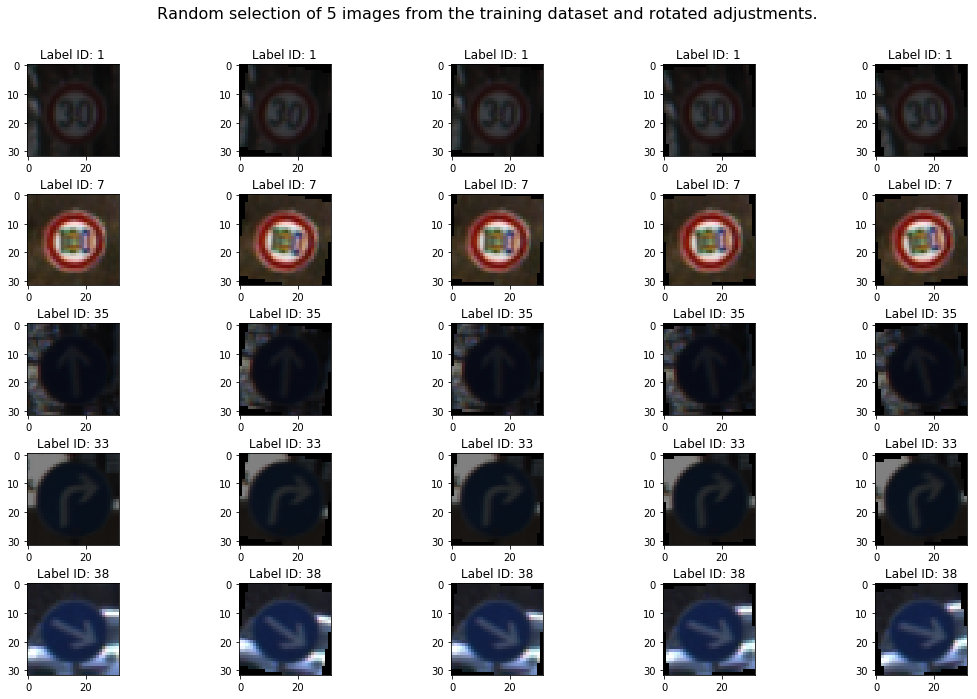

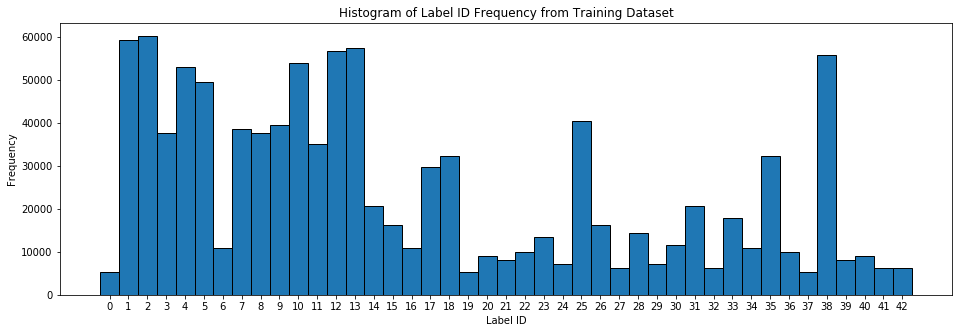

   LabelID	     Count
---------- 	 ----------
         0	      5400
         1	     59400
         2	     60300
         3	     37800
         4	     53100
         5	     49500
         6	     10800
         7	     38700
         8	     37800
         9	     39600
        10	     54000
        11	     35100
        12	     56700
        13	     57600
        14	     20700
        15	     16200
        16	     10800
        17	     29700
        18	     32400
        19	      5400
        20	      9000
        21	      8100
        22	      9900
        23	     13500
        24	      7200
        25	     40500
        26	     16200
        27	      6300
        28	     14400
        29	      7200
        30	     11700
        31	     20700
        32	      6300
        33	     17970
        34	     10800
        35	     32400
        36	      9900
        37	      5400
        38	     55800
        39	      8100
        40	      9000
        41	      6300
        42	      6300


In [8]:
##### Rotation (at finer angles) #####

IMAGE_SIZE = 32

# # TensorFlow 1.0 Method.  Not backward compatible.
# def rotate_images(X_imgs, start_angle, end_angle, n_images):
#     X_rotate = []
#     iterate_at = (end_angle - start_angle) / (n_images - 1)
    
#     tf.reset_default_graph()
#     X = tf.placeholder(tf.float32, shape = (None, IMAGE_SIZE, IMAGE_SIZE, 3))
#     radian = tf.placeholder(tf.float32, shape = (len(X_imgs)))
#     tf_img = tf.contrib.image.rotate(X, radian)
#     with tf.Session() as sess:
#         sess.run(tf.global_variables_initializer())
    
#         for index in range(n_images):
#             degrees_angle = start_angle + index * iterate_at
#             radian_value = degrees_angle * pi / 180  # Convert to radian
#             radian_arr = [radian_value] * len(X_imgs)
#             rotated_imgs = sess.run(tf_img, feed_dict = {X: X_imgs, radian: radian_arr})
#             X_rotate.extend(rotated_imgs)

#     X_rotate = np.array(X_rotate, dtype = np.float32)
#     return X_rotate



# Start rotation at -90 degrees, end at 90 degrees and produce totally 14 images
# rotated_imgs = rotate_images(X_imgs, -90, 90, 14)
###########################################################


# Produce rotated images of -10, -5, 5, and 10 degress of original image. [Training dataset]
X_train_05deg_neg = np.zeros_like(X_train)
X_train_05deg_pos = np.zeros_like(X_train)
X_train_10deg_neg = np.zeros_like(X_train)
X_train_10deg_pos = np.zeros_like(X_train)
y_train_deg = np.copy(y_train)

for i in range (0, len(X_train)):
    X_train_05deg_neg[i] = ndimage.rotate(X_train[i], -5, reshape=False)
    X_train_05deg_pos[i] = ndimage.rotate(X_train[i], 5, reshape=False)
    X_train_10deg_neg[i] = ndimage.rotate(X_train[i], -10, reshape=False)
    X_train_10deg_pos[i] = ndimage.rotate(X_train[i], 10, reshape=False)

# Plot 5 random images from the training set with accompanying labels.
fig, ax = plt.subplots(5, 5, figsize=(15, 10))
fig.tight_layout(pad=2.0)
fig.suptitle('Random selection of 5 images from the training dataset and rotated adjustments.', fontsize=16)
fig.subplots_adjust(top=0.90)
ax = ax.ravel()
for i in range(0, 25, 5):
    index = random.randint(0, len(X_train))
    ax[i].imshow(X_train[index])
    ax[i].set_title('Label ID: ' + str(y_train[index]))
    ax[i+1].imshow(X_train_10deg_neg[index])
    ax[i+1].set_title('Label ID: ' + str(y_train[index]))
    ax[i+2].imshow(X_train_05deg_neg[index])
    ax[i+2].set_title('Label ID: ' + str(y_train[index]))
    ax[i+3].imshow(X_train_05deg_pos[index])
    ax[i+3].set_title('Label ID: ' + str(y_train[index]))
    ax[i+4].imshow(X_train_10deg_pos[index])
    ax[i+4].set_title('Label ID: ' + str(y_train[index]))
    
print("X_train, y_train shapes BEFORE concatenating rotated images:", X_train.shape, y_train.shape)
print("Adding", len(X_train) * 4, "images")

# Add darkened and brightened images to X_train dataset
X_train = np.concatenate((X_train, X_train_10deg_neg), axis=0)
y_train = np.concatenate((y_train, y_train_deg), axis=0)
X_train = np.concatenate((X_train, X_train_05deg_neg), axis=0)
y_train = np.concatenate((y_train, y_train_deg), axis=0)
X_train = np.concatenate((X_train, X_train_05deg_pos), axis=0)
y_train = np.concatenate((y_train, y_train_deg), axis=0)
X_train = np.concatenate((X_train, X_train_10deg_pos), axis=0)
y_train = np.concatenate((y_train, y_train_deg), axis=0)

print("X_train, y_train shapes AFTER concatenating rotated images:", X_train.shape, y_train.shape)

# Clear unnecessary arrays to free up memory
X_train_10deg_neg = []
X_train_05deg_neg = []
X_train_05deg_pos = []
X_train_10deg_pos = []
y_train_deg = []

# Updated histogram of label frequency
plt.figure(figsize=(16, 5))
n, bins, patches = plt.hist(y_train, bins=range(n_classes+1), histtype='bar', align='left', alpha=1, edgecolor='black')
locs, labels = xticks()
xticks(np.arange(np.min(y_train), np.max(y_train)+1, step=1))
plt.xlabel('Label ID')
plt.ylabel('Frequency')
plt.title('Histogram of Label ID Frequency from Training Dataset')
plt.show()

print("{:>10s}".format("LabelID") + "\t" + "{:>10s}".format("Count"))
print("----------", "\t", "----------")

for i in range(0, len(n)):
    print("{:>10d}".format(i) + "\t" + "{:>10d}".format(int(n[i])))

X_train, y_train shapes BEFORE concatenating perspective transformed images: (1043970, 32, 32, 3) (1043970,)
Adding 1600280 images
X_train, y_train shapes AFTER concatenating rotated images: (2644250, 32, 32, 3) (2644250,)


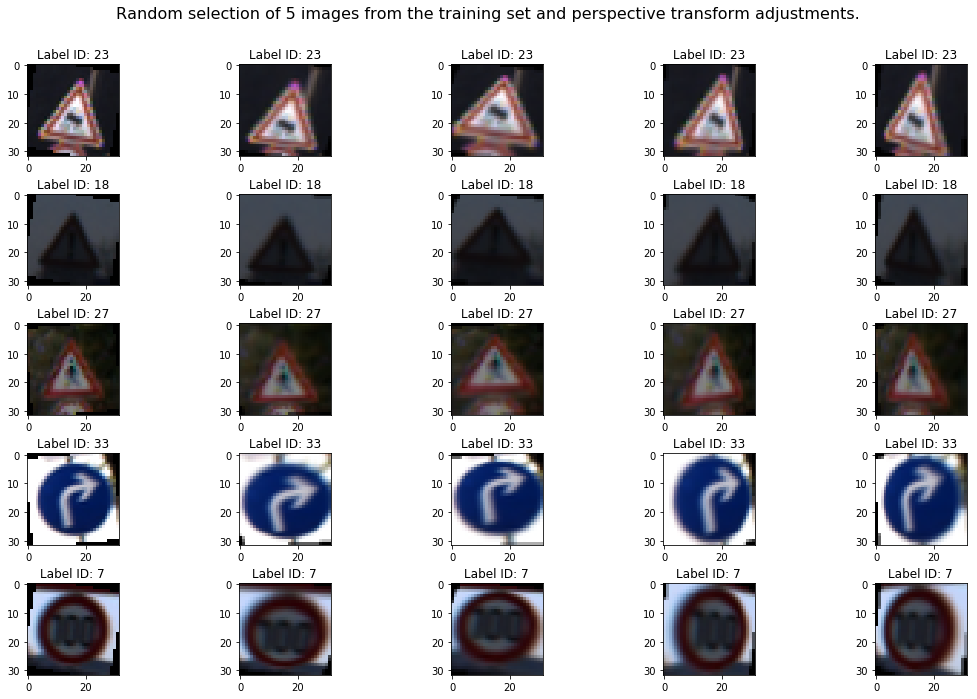

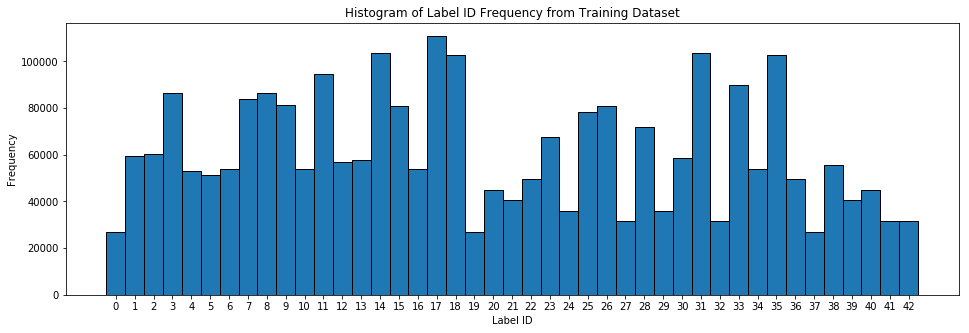

   LabelID	     Count
---------- 	 ----------
         0	     27000
         1	     59400
         2	     60300
         3	     86600
         4	     53100
         5	     51500
         6	     54000
         7	     83900
         8	     86600
         9	     81200
        10	     54000
        11	     94700
        12	     56700
        13	     57600
        14	    103500
        15	     81000
        16	     54000
        17	    110900
        18	    102800
        19	     27000
        20	     45000
        21	     40500
        22	     49500
        23	     67500
        24	     36000
        25	     78500
        26	     81000
        27	     31500
        28	     72000
        29	     36000
        30	     58500
        31	    103500
        32	     31500
        33	     89850
        34	     54000
        35	    102800
        36	     49500
        37	     27000
        38	     55800
        39	     40500
        40	     45000
        41	     31500
        42	     31500


In [9]:
##### Perspective Transform #####

def get_mask_coord(imshape, pov):
    # Perspective Right
    if pov=='right':
        vertices = np.array([[(0, imshape[0]),              # Bottom-Left Corner
                              (0, 0),                       # Top-Left Corner
                              (imshape[1]-1, 0+5),          # Top-Right Corner
                              (imshape[1]-1, imshape[0]-5), # Bottom-Right Corner
                              ]], dtype = np.int32)
    # Perspective Left
    elif pov=='left':
        vertices = np.array([[(0+1, imshape[0]-5),      # Bottom-Left Corner
                              (0+1, 0+5),               # Top-Left Corner
                              (imshape[1], 0),          # Top-Right Corner
                              (imshape[1], imshape[0]), # Bottom-Right Corner
                              ]], dtype = np.int32)
    # Perspective Left
    elif pov=='top':
        vertices = np.array([[(0, imshape[0]),          # Bottom-Left Corner
                              (0+5, 0+1),               # Top-Left Corner
                              (imshape[1]-5, 0+1),      # Top-Right Corner
                              (imshape[1], imshape[0]), # Bottom-Right Corner
                              ]], dtype = np.int32)
    # Perspective Left
    elif pov=='bottom':
        vertices = np.array([[(0+5, imshape[0]-1),              # Bottom-Left Corner
                              (0, 0),                       # Top-Left Corner
                              (imshape[1], 0),          # Top-Right Corner
                              (imshape[1]-5, imshape[0]-1), # Bottom-Right Corner
                              ]], dtype = np.int32)    
    # No Perspective Change
    else:
        vertices = np.array([[(0, imshape[0]),            # Bottom-Left Corner
                              (0, 0),                     # Top-Left Corner
                              (imshape[1], 0),            # Top-Right Corner
                              (imshape[1], imshape[0]),   # Bottom-Right Corner
                              ]], dtype = np.int32)
    return vertices



def get_perspective_matrices(X_img, pov):
    offset = 0
    img_size = (X_img.shape[1], X_img.shape[0])

    # Estimate the coordinates of object of interest inside the image.
    src = np.float32(get_mask_coord(X_img.shape, pov))
    dst = np.float32([[offset, img_size[1]], [offset, 0], [img_size[0] - offset, 0], 
                      [img_size[0] - offset, img_size[1]]])
    
    perspective_matrix = cv2.getPerspectiveTransform(src, dst)
    return perspective_matrix



def perspective_transform(X_img, pov):
    # Doing only for one type of example
    perspective_matrix = get_perspective_matrices(X_img, pov)
    warped_img = cv2.warpPerspective(X_img, perspective_matrix,
                                     (X_img.shape[1], X_img.shape[0]),
                                     flags = cv2.INTER_LINEAR)
    return warped_img

######################################################################################

max_count = 50000
X_train_lowcount = []
y_train_lowcount = []
n_counter = copy.deepcopy(n)

# Get list of images to process
for i in range (0, len(X_train)):
    if n_counter[y_train[i]] < max_count:
        # Add image to new list or array
        # Add label to new list or array
        X_train_lowcount.append(X_train[i])
        y_train_lowcount.append(y_train[i])
        # Increment n_counter
        n_counter[y_train[i]] += 1

X_train_lowcount = np.array(X_train_lowcount)
y_train_lowcount = np.array(y_train_lowcount)

X_train_xfm_top = np.zeros_like(X_train_lowcount)
X_train_xfm_bottom = np.zeros_like(X_train_lowcount)
X_train_xfm_left = np.zeros_like(X_train_lowcount)
X_train_xfm_right = np.zeros_like(X_train_lowcount)
y_train_xfm = np.copy(y_train_lowcount)

# Perspective Transforms
for i in range (0, len(X_train_lowcount)):
    X_train_xfm_top[i] = perspective_transform(X_train_lowcount[i], pov='top')
    X_train_xfm_bottom[i] = perspective_transform(X_train_lowcount[i], pov='bottom')
    X_train_xfm_left[i] = perspective_transform(X_train_lowcount[i], pov='left')
    X_train_xfm_right[i] = perspective_transform(X_train_lowcount[i], pov='right')

# Plot 5 random images from the training set with accompanying labels.
fig, ax = plt.subplots(5, 5, figsize=(15, 10))
fig.tight_layout(pad=2.0)
fig.suptitle('Random selection of 5 images from the training set and perspective transform adjustments.', fontsize=16)
fig.subplots_adjust(top=0.90)
ax = ax.ravel()
for i in range(0, 25, 5):
    index = random.randint(0, len(X_train_lowcount))
    ax[i].imshow(X_train_lowcount[index])
    ax[i].set_title('Label ID: ' + str(y_train_lowcount[index]))
    ax[i+1].imshow(X_train_xfm_top[index])
    ax[i+1].set_title('Label ID: ' + str(y_train_xfm[index]))
    ax[i+2].imshow(X_train_xfm_bottom[index])
    ax[i+2].set_title('Label ID: ' + str(y_train_xfm[index]))
    ax[i+3].imshow(X_train_xfm_left[index])
    ax[i+3].set_title('Label ID: ' + str(y_train_xfm[index]))
    ax[i+4].imshow(X_train_xfm_right[index])
    ax[i+4].set_title('Label ID: ' + str(y_train_xfm[index]))
    
print("X_train, y_train shapes BEFORE concatenating perspective transformed images:", X_train.shape, y_train.shape)
print("Adding", len(X_train_lowcount) * 4, "images")

# Add perspective transformed to X_train dataset
X_train = np.concatenate((X_train, X_train_xfm_top), axis=0)
X_train_xfm_top = []
y_train = np.concatenate((y_train, y_train_xfm), axis=0)

X_train = np.concatenate((X_train, X_train_xfm_bottom), axis=0)
X_train_xfm_bottom = []
y_train = np.concatenate((y_train, y_train_xfm), axis=0)

X_train = np.concatenate((X_train, X_train_xfm_left), axis=0)
X_train_xfm_left = []
y_train = np.concatenate((y_train, y_train_xfm), axis=0)

X_train = np.concatenate((X_train, X_train_xfm_right), axis=0)
X_train_xfm_right = []
y_train = np.concatenate((y_train, y_train_xfm), axis=0)

print("X_train, y_train shapes AFTER concatenating rotated images:", X_train.shape, y_train.shape)

# Clear unnecessary lists and arrays to free up memory
X_train_lowcount = []
y_train_lowcount = []
y_train_xfm = []

# Updated histogram of label frequency
plt.figure(figsize=(16, 5))
n, bins, patches = plt.hist(y_train, bins=range(n_classes+1), histtype='bar', align='left', alpha=1, edgecolor='black')
locs, labels = xticks()
xticks(np.arange(np.min(y_train), np.max(y_train)+1, step=1))
plt.xlabel('Label ID')
plt.ylabel('Frequency')
plt.title('Histogram of Label ID Frequency from Training Dataset')
plt.show()

print("{:>10s}".format("LabelID") + "\t" + "{:>10s}".format("Count"))
print("----------", "\t", "----------")

for i in range(0, len(n)):
    print("{:>10d}".format(i) + "\t" + "{:>10d}".format(int(n[i])))
    

X_train, y_train shapes BEFORE concatenating perspective transformed images: (2644250, 32, 32, 3) (2644250,)
Adding 201000 images
X_train, y_train shapes AFTER concatenating rotated images: (2845250, 32, 32, 3) (2845250,)


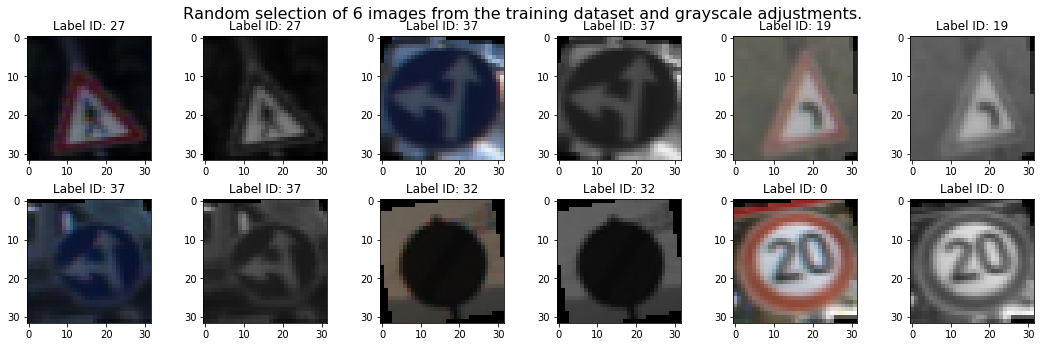

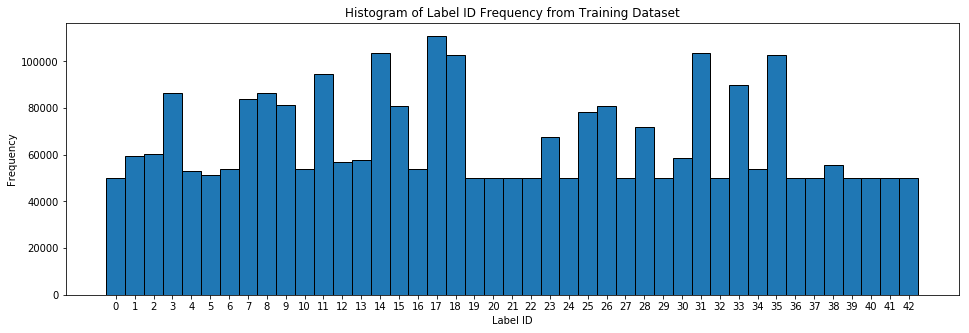

   LabelID	     Count
---------- 	 ----------
         0	     50000
         1	     59400
         2	     60300
         3	     86600
         4	     53100
         5	     51500
         6	     54000
         7	     83900
         8	     86600
         9	     81200
        10	     54000
        11	     94700
        12	     56700
        13	     57600
        14	    103500
        15	     81000
        16	     54000
        17	    110900
        18	    102800
        19	     50000
        20	     50000
        21	     50000
        22	     50000
        23	     67500
        24	     50000
        25	     78500
        26	     81000
        27	     50000
        28	     72000
        29	     50000
        30	     58500
        31	    103500
        32	     50000
        33	     89850
        34	     54000
        35	    102800
        36	     50000
        37	     50000
        38	     55800
        39	     50000
        40	     50000
        41	     50000
        42	     50000


In [10]:
## Grayscale Images #####

max_count = 50000
X_train_lowcount = []
y_train_lowcount = []
n_counter = copy.deepcopy(n)

# Get list of images to process
for i in range (0, len(X_train)):
    if n_counter[y_train[i]] < max_count:
        # Add image to new list or array
        # Add label to new list or array
        X_train_lowcount.append(X_train[i])
        y_train_lowcount.append(y_train[i])
        # Increment n_counter
        n_counter[y_train[i]] += 1

X_train_lowcount = np.array(X_train_lowcount)
y_train_lowcount = np.array(y_train_lowcount)

# X_train_gray = np.zeros_like(X_train_lowcount)
X_train_gray = np.zeros(X_train_lowcount.shape[:-1])
y_train_gray = np.copy(y_train_lowcount)

# Convert to single-channel grayscale
for i in range(X_train_lowcount.shape[0]): 
    X_train_gray[i] = cv2.cvtColor(X_train_lowcount[i], cv2.COLOR_BGR2GRAY)

# Convert to 3-channel BGR
X_train_gray_stacked = np.zeros_like(X_train_lowcount)

for i in range(0, len(X_train_gray)):
    X_train_gray_stacked[i] = np.stack((X_train_gray[i],)*3, axis=-1)

# Plot 6 random images from the training set with accompanying labels.
fig, ax = plt.subplots(2, 6, figsize=(15, 5))
fig.tight_layout(pad=2.0)
fig.suptitle('Random selection of 6 images from the training dataset and grayscale adjustments.', fontsize=16)
fig.subplots_adjust(top=0.90)
ax = ax.ravel()
for i in range(0, 12, 2):
    index = random.randint(0, len(X_train_lowcount))
    ax[i].imshow(X_train_lowcount[index])
    ax[i].set_title('Label ID: ' + str(y_train_lowcount[index]))
    ax[i+1].imshow(X_train_gray_stacked[index], cmap='gray')
    ax[i+1].set_title('Label ID: ' + str(y_train_gray[index]))
    
print("X_train, y_train shapes BEFORE concatenating perspective transformed images:", X_train.shape, y_train.shape)
print("Adding", len(X_train_lowcount), "images")

# Add perspective transformed to X_train dataset
X_train = np.concatenate((X_train, X_train_gray_stacked), axis=0)
X_train_gray = []
X_train_gray_stacked = []
y_train = np.concatenate((y_train, y_train_gray), axis=0)

print("X_train, y_train shapes AFTER concatenating rotated images:", X_train.shape, y_train.shape)

# Clear unnecessary lists and arrays to free up memory
X_train_lowcount = []
y_train_lowcount = []
y_train_gray = []

# Updated histogram of label frequency
plt.figure(figsize=(16, 5))
n, bins, patches = plt.hist(y_train, bins=range(n_classes+1), histtype='bar', align='left', alpha=1, edgecolor='black')
locs, labels = xticks()
xticks(np.arange(np.min(y_train), np.max(y_train)+1, step=1))
plt.xlabel('Label ID')
plt.ylabel('Frequency')
plt.title('Histogram of Label ID Frequency from Training Dataset')
plt.show()

print("{:>10s}".format("LabelID") + "\t" + "{:>10s}".format("Count"))
print("----------", "\t", "----------")

for i in range(0, len(n)):
    print("{:>10d}".format(i) + "\t" + "{:>10d}".format(int(n[i])))
        

Instructions for updating:
box_ind is deprecated, use box_indices instead
X_train, y_train shapes BEFORE concatenating perspective transformed images: (2845250, 32, 32, 3) (2845250,)
Adding 1102950 images
X_train, y_train shapes AFTER concatenating rotated images: (3948200, 32, 32, 3) (3948200,)


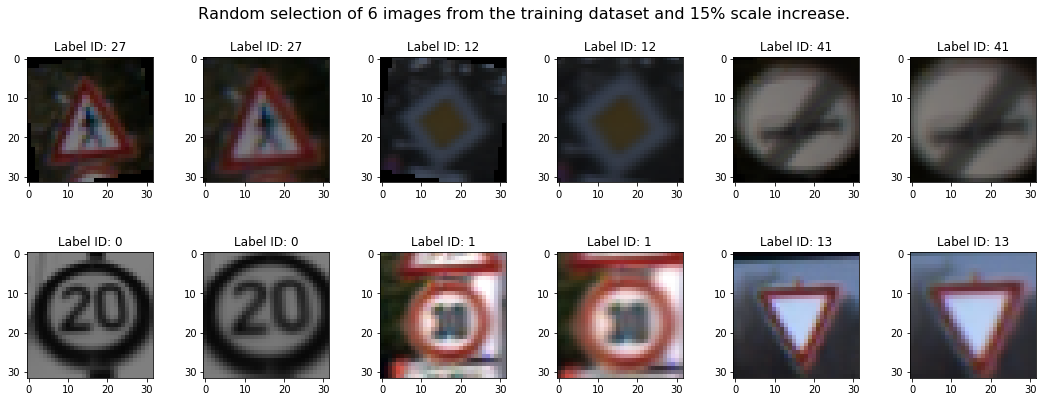

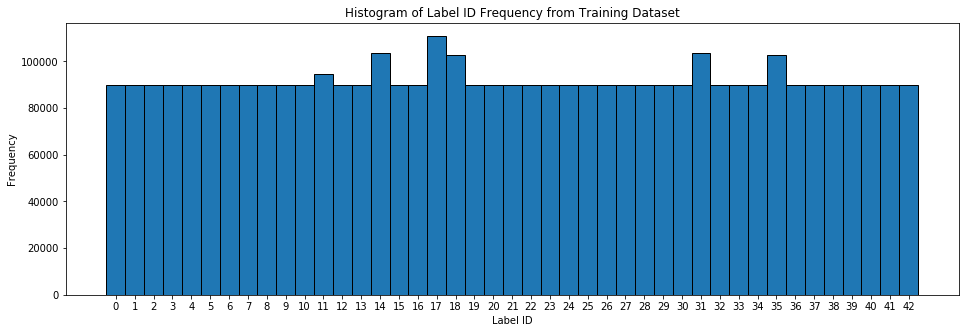

   LabelID	     Count
---------- 	 ----------
         0	     90000
         1	     90000
         2	     90000
         3	     90000
         4	     90000
         5	     90000
         6	     90000
         7	     90000
         8	     90000
         9	     90000
        10	     90000
        11	     94700
        12	     90000
        13	     90000
        14	    103500
        15	     90000
        16	     90000
        17	    110900
        18	    102800
        19	     90000
        20	     90000
        21	     90000
        22	     90000
        23	     90000
        24	     90000
        25	     90000
        26	     90000
        27	     90000
        28	     90000
        29	     90000
        30	     90000
        31	    103500
        32	     90000
        33	     90000
        34	     90000
        35	    102800
        36	     90000
        37	     90000
        38	     90000
        39	     90000
        40	     90000
        41	     90000
        42	     90000


In [11]:
##### Scale Up #####

def central_scale_images(X_imgs, scales):
    # Various settings needed for Tensorflow operation
    boxes = np.zeros((len(scales), 4), dtype = np.float32)
    for index, scale in enumerate(scales):
        x1 = y1 = 0.5 - 0.5 * scale # To scale centrally
        x2 = y2 = 0.5 + 0.5 * scale
        boxes[index] = np.array([y1, x1, y2, x2], dtype = np.float32)
    box_ind = np.zeros((len(scales)), dtype = np.int32)
    crop_size = np.array([IMAGE_SIZE, IMAGE_SIZE], dtype = np.int32)
    
    X_scale_data = []
    tf.reset_default_graph()
    X = tf.placeholder(tf.float32, shape = (1, IMAGE_SIZE, IMAGE_SIZE, 3))
    # Define Tensorflow operation for all scales but only one base image at a time
    tf_img = tf.image.crop_and_resize(X, boxes, box_ind, crop_size)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for img_data in X_imgs:
            batch_img = np.expand_dims(img_data, axis = 0)
            scaled_imgs = sess.run(tf_img, feed_dict = {X: batch_img})
            X_scale_data.extend(scaled_imgs)
    
    X_scale_data = np.array(X_scale_data, dtype = np.float32)
    return X_scale_data

# Produce each image at scaling of 90%, 75% and 60% of original image.
# scaled_imgs = central_scale_images(X_imgs, [0.90])



max_count = 90000
X_train_lowcount = []
y_train_lowcount = []
n_counter = copy.deepcopy(n)

# Get list of images to process
for i in range (0, len(X_train)):
    if n_counter[y_train[i]] < max_count:
        # Add image to new list or array
        # Add label to new list or array
        X_train_lowcount.append(X_train[i])
        y_train_lowcount.append(y_train[i])
        # Increment n_counter
        n_counter[y_train[i]] += 1

X_train_lowcount = np.array(X_train_lowcount)
y_train_lowcount = np.array(y_train_lowcount)

X_train_scaled = central_scale_images(X_train_lowcount, [0.85])
X_train_scaled = X_train_scaled.astype('uint8')
y_train_scaled = np.copy(y_train_lowcount)

# Plot 6 random images from the training set with accompanying labels.
fig, ax = plt.subplots(2, 6, figsize=(15, 6))
fig.tight_layout(pad=2.0)
fig.suptitle('Random selection of 6 images from the training dataset and 15% scale increase.', fontsize=16)
fig.subplots_adjust(top=0.90)
ax = ax.ravel()
for i in range(0, 12, 2):
    index = random.randint(0, len(X_train_lowcount))
    ax[i].imshow(X_train_lowcount[index])
    ax[i].set_title('Label ID: ' + str(y_train_lowcount[index]))
    ax[i+1].imshow(X_train_scaled[index])
    ax[i+1].set_title('Label ID: ' + str(y_train_scaled[index]))
    
print("X_train, y_train shapes BEFORE concatenating perspective transformed images:", X_train.shape, y_train.shape)
print("Adding", len(X_train_lowcount), "images")

# Add perspective transformed to X_train dataset
X_train = np.concatenate((X_train, X_train_scaled), axis=0)
X_train_scaled = []
y_train = np.concatenate((y_train, y_train_scaled), axis=0)

print("X_train, y_train shapes AFTER concatenating rotated images:", X_train.shape, y_train.shape)

# Clear unnecessary lists and arrays to free up memory
X_train_lowcount = []
y_train_lowcount = []
y_train_scaled = []

# Updated histogram of label frequency
plt.figure(figsize=(16, 5))
n, bins, patches = plt.hist(y_train, bins=range(n_classes+1), histtype='bar', align='left', alpha=1, edgecolor='black')
locs, labels = xticks()
xticks(np.arange(np.min(y_train), np.max(y_train)+1, step=1))
plt.xlabel('Label ID')
plt.ylabel('Frequency')
plt.title('Histogram of Label ID Frequency from Training Dataset')
plt.show()

print("{:>10s}".format("LabelID") + "\t" + "{:>10s}".format("Count"))
print("----------", "\t", "----------")

for i in range(0, len(n)):
    print("{:>10d}".format(i) + "\t" + "{:>10d}".format(int(n[i])))

In [12]:
# Clear unecessary arrays--just in case!
X_train_norm = []
X_train_gauss_darken = []
X_train_gauss_brighten = []
X_train_05deg_neg = []
X_train_05deg_pos = []
X_train_10deg_neg = []
X_train_10deg_pos = []
X_train_xfm_top = []
X_train_xfm_bottom = []
X_train_xfm_left = []
X_train_xfm_right = []

y_train_norm = []
y_train_gauss_darken = []
y_train_gauss_brighten = []
y_train_05deg_neg = []
y_train_05deg_pos = []
y_train_10deg_neg = []
y_train_10deg_pos = []
y_train_xfm_top = []
y_train_xfm_bottom = []
y_train_xfm_left = []


Images Shuffled
X_train, y_train shapes of augmented dataset: (3948200, 32, 32, 3) (3948200,)


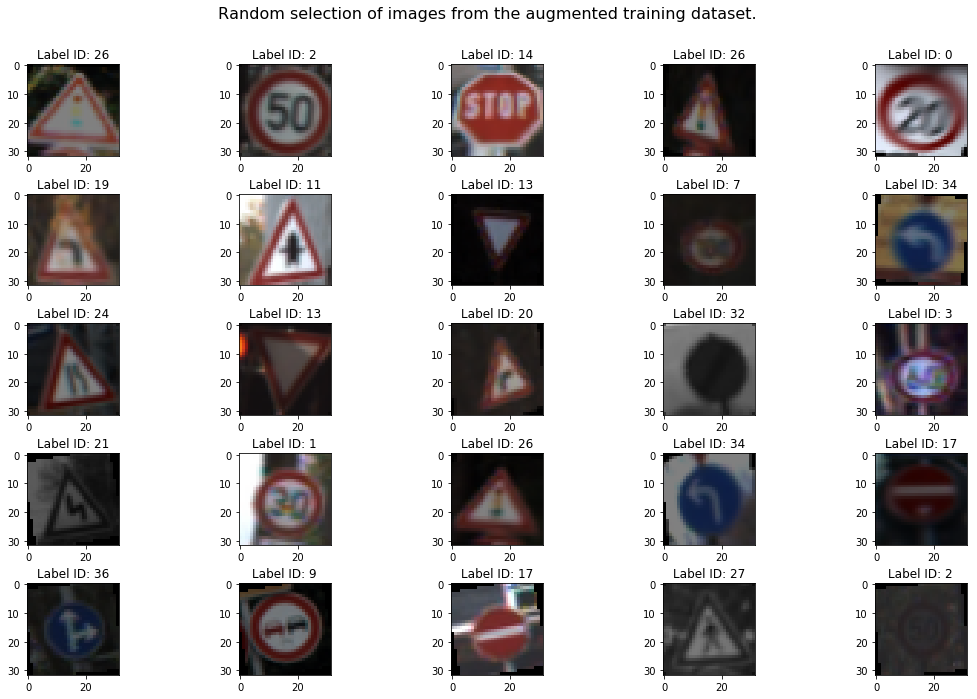

In [13]:
# Shuffle Images
X_train, y_train = shuffle(X_train, y_train)

print('Images Shuffled')
print("X_train, y_train shapes of augmented dataset:", X_train.shape, y_train.shape)

# Plot random images from the training set with accompanying labels.
fig, ax = plt.subplots(5, 5, figsize=(15, 10))
fig.tight_layout(pad=2.0)
fig.suptitle('Random selection of images from the augmented training dataset.', fontsize=16)
fig.subplots_adjust(top=0.90)
ax = ax.ravel()
for i in range(0, 25):
    index = random.randint(0, len(X_train))
    ax[i].imshow(X_train[index])
    ax[i].set_title('Label ID: ' + str(y_train[index]))

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels.  The dataset is a collection of RGB color and grayscale images with channels C=3 and C=1, respectively.

### Model Architecture

[LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture was used as the base architecture for training the model. Modifications to this architecture are _**emphasized below**_.

**Layer 1: Convolutional.** The output shape is 28x28x6.

**Activation.** ReLU.

**Pooling.** The output shape is 14x14x6.

**Layer 2: Convolutional.** The output shape is 10x10x16.

**Activation.** ReLU.

**Pooling.** The output shape is 5x5x16.

_**Dropout.** A dropout layer is added after the previous pooling layer.  The probability of keeping the output is dictated by the_ `keep_prob` _variable._

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`.

**Layer 3: Fully Connected.** This has 120 outputs.

**Activation.** ReLU.

**Layer 4: Fully Connected.** This has 84 outputs.

**Activation.** ReLU.

**Layer 5: Fully Connected (Logits).** This has 43 outputs--one for each traffic sign label.

### Output

Return the result of the 2nd fully connected layer.  The output of the first and second convolution layers are also output for visualization at the end of this notebook.

In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

EPOCHS = 20
BATCH_SIZE = 512

# Architecture: LeNet-5, modified
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
#     Defaults
#     mu = 0
#     sigma = 0.1
    
    mu = 0.0
    sigma = 0.05
    
#     Additional layers did not seem to improve performance from default settings.
#     Only one additional dropout layer was kept in the model after the second fully connected layer (fc2)
#     # Layer 0: Convolutional. Input = 32x32x3. Output = 32x32x3.
#     # output_height = (input_height - filter_height + 1) / vertical_stride = (32 - 1 + 1) / 1 = 32
#     # output_width = (input_width - filter_width + 1) / horizontal_stride = (32 - 1 + 1) / 1 = 32
#     conv0_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 3, 3), mean=mu, stddev=sigma))
#     conv0_b = tf.Variable(tf.zeros(3))
#     conv0 = tf.nn.conv2d(x, conv0_W, strides=[1, 1, 1, 1], padding='SAME') + conv0_b

#     # Activation.
#     conv0 = tf.nn.relu(conv0)

#     # Pooling. Input = 32x32x3. Output = 32x32x3.
#     conv0 = tf.nn.max_pool(conv0, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='SAME')    
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    # output_height = (input_height - filter_height + 1) / vertical_stride = (32 - 5 + 1) / 1 = 28
    # output_width = (input_width - filter_width + 1) / horizontal_stride = (32 - 5 + 1) / 1 = 28
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
#     # Dropout
#     conv1 = tf.nn.dropout(conv1, keep_prob)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Dropout
    conv2drop = tf.nn.dropout(conv2, keep_prob)

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2drop)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    
#     # Dropout
#     fc1 = tf.nn.dropout(fc1, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    # TODO: Activation
    fc2 = tf.nn.relu(fc2)

#     # Dropout
#     fc2 = tf.nn.dropout(fc2, keep_prob)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43 (classes of traffic signs).
    output_classes = 43
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, output_classes), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(output_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits, conv1, conv2



def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



# Features and Labels
# One-Hot encoding
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

# Training Pipeline
logits, tf_activation1, tf_activation2 = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.Flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# The accuracy measured against the validation set
validation_accuracy = 0.0

# Measurements use for graphing loss and accuracy
epochs_list = []
loss_ep = []
train_acc_ep = []
valid_acc_ep = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)

        train_acc_ep.append(training_accuracy)
        valid_acc_ep.append(validation_accuracy)
        epochs_list.append(i+1)

        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy   = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './Traffic_Sign_Classifier_lenet')
    print("Model saved")

print('Validation accuracy at {}'.format(validation_accuracy))

Training...

EPOCH 1 ...
Training Accuracy   = 0.995
Validation Accuracy = 0.962

EPOCH 2 ...
Training Accuracy   = 0.995
Validation Accuracy = 0.967

EPOCH 3 ...
Training Accuracy   = 0.997
Validation Accuracy = 0.971

EPOCH 4 ...
Training Accuracy   = 0.996
Validation Accuracy = 0.969

EPOCH 5 ...
Training Accuracy   = 0.996
Validation Accuracy = 0.969

EPOCH 6 ...
Training Accuracy   = 0.997
Validation Accuracy = 0.964

EPOCH 7 ...
Training Accuracy   = 0.998
Validation Accuracy = 0.970

EPOCH 8 ...
Training Accuracy   = 0.997
Validation Accuracy = 0.965

EPOCH 9 ...
Training Accuracy   = 0.997
Validation Accuracy = 0.961

EPOCH 10 ...
Training Accuracy   = 0.998
Validation Accuracy = 0.967

EPOCH 11 ...
Training Accuracy   = 0.998
Validation Accuracy = 0.962

EPOCH 12 ...
Training Accuracy   = 0.998
Validation Accuracy = 0.961

EPOCH 13 ...
Training Accuracy   = 0.997
Validation Accuracy = 0.965

EPOCH 14 ...
Training Accuracy   = 0.998
Validation Accuracy = 0.959

EPOCH 15 ...
Tra

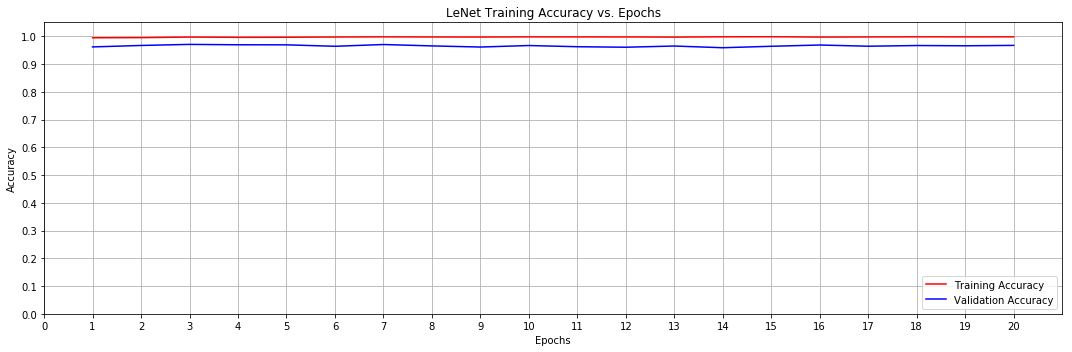

In [16]:
plt.figure(figsize=(15, 5))
plt.title('LeNet Training Accuracy vs. Epochs')
plt.plot(epochs_list, train_acc_ep, 'r', label='Training Accuracy')
plt.plot(epochs_list, valid_acc_ep, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1.05])
plt.xlim([0, epochs_list[-1]+1])
plt.xticks(np.arange(0,21,1))
plt.yticks(np.arange(0,1.1,0.1))
plt.legend(loc=4)
plt.grid(True)
plt.tight_layout()
plt.show()

## Evaluate the Model Against the Testing Dataset

Evaluate the performance of the model on the test set.

Note: If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.


In [17]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./Traffic_Sign_Classifier_lenet
Test Accuracy = 0.950


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

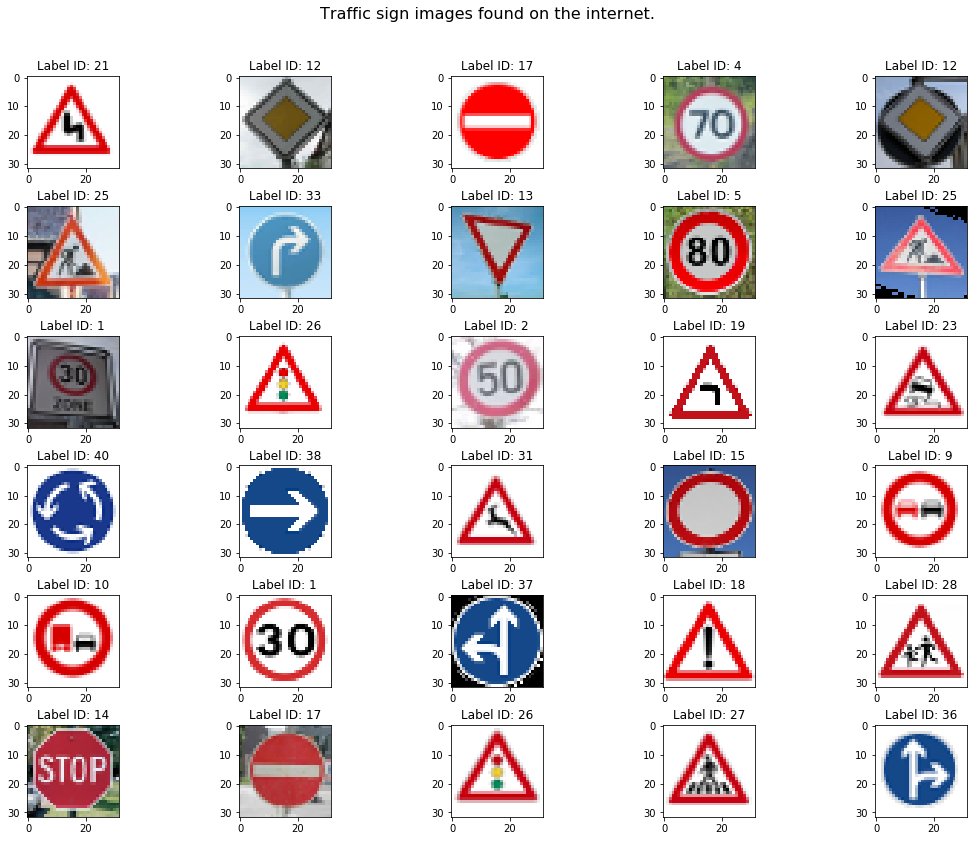

In [18]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import glob

X_newimg_list = []
y_newimg_list = []

for i, img in enumerate(glob.glob('./trafficsignimages/32x32x3/*.png')):
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    X_newimg_list.append(image)
    
y_newimg_list = [21, 12, 17, 4, 12, 
                 25, 33, 13, 5, 25, 
                 1, 26, 2, 19, 23, 
                 40, 38, 31, 15, 9, 
                 10, 1, 37, 18, 28, 
                 14, 17, 26, 27, 36 ]

X_newimg = np.array(X_newimg_list)
y_newimg = np.array(y_newimg_list)

# Show new images in the order they appear in the list (not random)
fig, ax = plt.subplots(6, 5, figsize=(15, 12))
fig.tight_layout(pad=2.0)
fig.suptitle('Traffic sign images found on the internet.', fontsize=16)
fig.subplots_adjust(top=0.90)
ax = ax.ravel()
for i in range(0, len(X_newimg_list)):
#     index = random.randint(0, len(X_train))
    ax[i].imshow(X_newimg[i])
    ax[i].set_title('Label ID: ' + str(y_newimg[i]))



### Predict the Sign Type for Each Image

The ground truth and predicted label ID for each image is shown below.  In instances that the ground truth and predicted labels do not match, the text above the image will appear red.

INFO:tensorflow:Restoring parameters from ./Traffic_Sign_Classifier_lenet


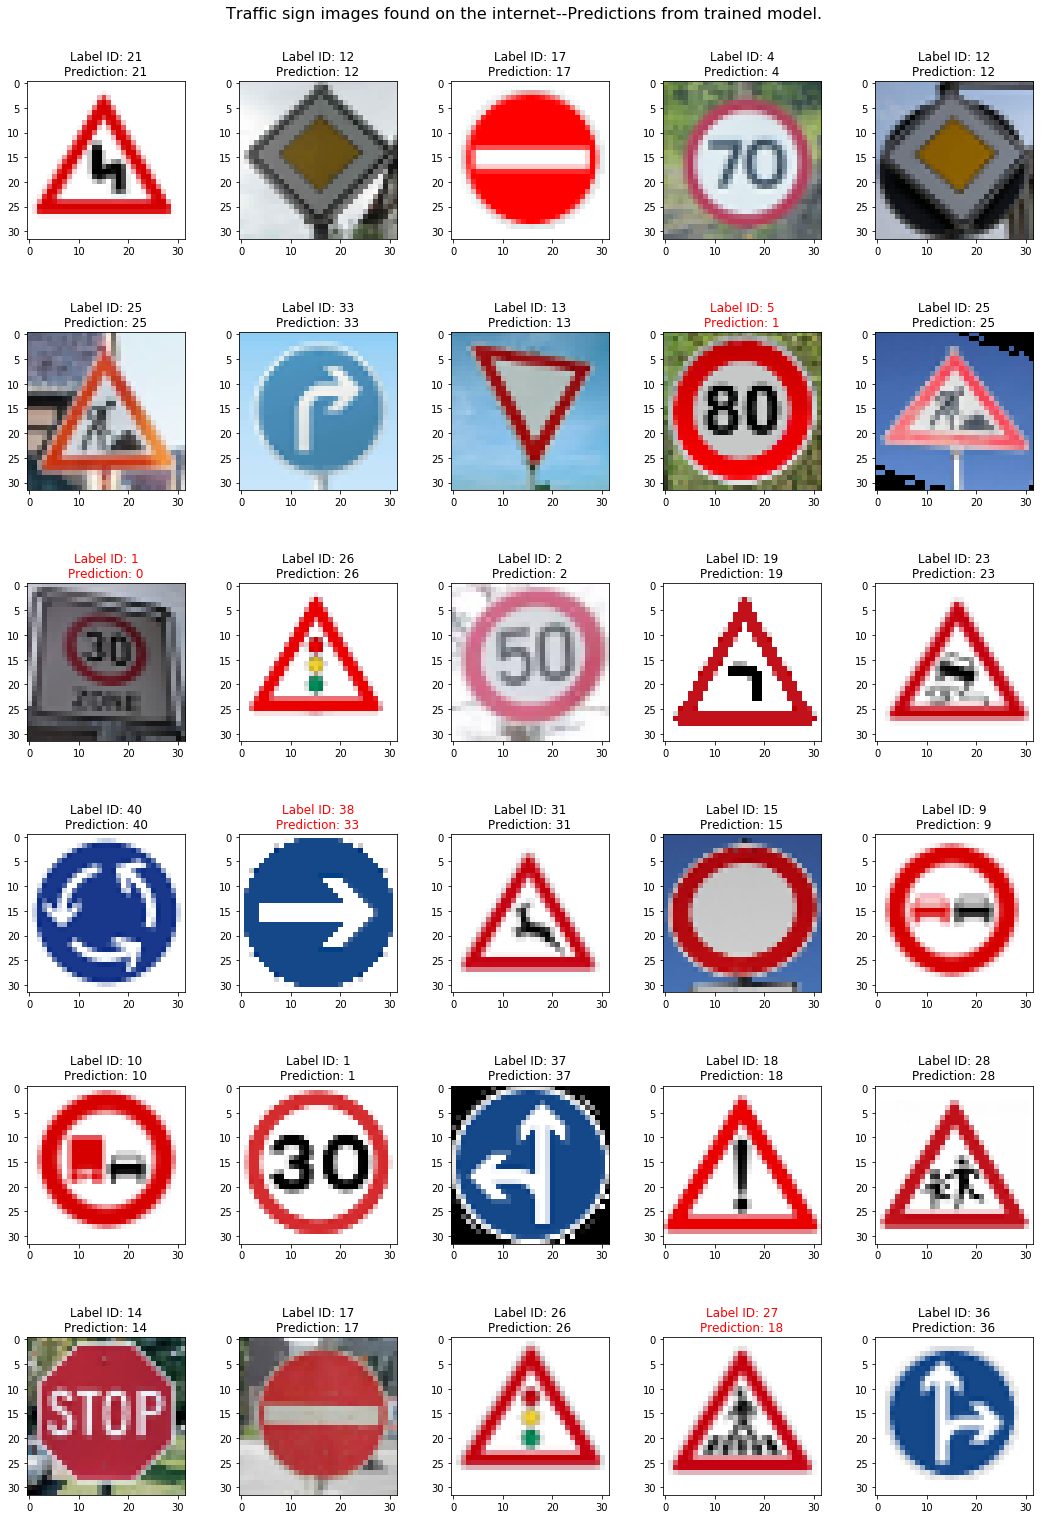

In [19]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

fig, ax = plt.subplots(6, 5, figsize=(15, 22))
fig.tight_layout(pad=2.0)
fig.suptitle('Traffic sign images found on the internet--Predictions from trained model.', fontsize=16)
fig.subplots_adjust(top=0.95)
ax = ax.ravel()

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    for i in range(0, len(X_newimg)):
        X_newimg1 = np.array(X_newimg[i])
        X_newimg1_arr = np.expand_dims(X_newimg1, axis=0)
        y_newimg1 = np.array(y_newimg[i])
        y_newimg1_arr = np.expand_dims(y_newimg1, axis=0)

        y_prediction = sess.run(logits, feed_dict={x: X_newimg1_arr, keep_prob: 1.0})
        y_prediction_label = list(y_prediction[0]).index(max(y_prediction[0]))
        
        ax[i].imshow(X_newimg1)
        
        if y_newimg1 == y_prediction_label:
            ax[i].set_title('Label ID: ' + str(y_newimg1) + '\nPrediction: ' + str(y_prediction_label))
        else:
            ax[i].set_title('Label ID: ' + str(y_newimg1) + '\nPrediction: ' + str(y_prediction_label), color='r')
            

### Analyze Performance

In [20]:
### Calculate the accuracy for these new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

count_correct = 0

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    newimg_accuracy = evaluate(X_newimg, y_newimg)
    print("New Image Accuracy = {:.3f}".format(newimg_accuracy))

    for i in range(0, len(X_newimg)):
        X_newimg1 = np.array(X_newimg[i])
        X_newimg1_arr = np.expand_dims(X_newimg1, axis=0)
        y_newimg1 = np.array(y_newimg[i])
        y_newimg1_arr = np.expand_dims(y_newimg1, axis=0)

        y_prediction = sess.run(logits, feed_dict={x: X_newimg1_arr, keep_prob: 1.0})
        y_prediction_label = list(y_prediction[0]).index(max(y_prediction[0]))
        
        ax[i].imshow(X_newimg1)
        
        if y_newimg1 == y_prediction_label:
            count_correct += 1

newimg1_accuracy = count_correct / len(X_newimg)

print('\nCalculated accuracy by individual image analysis:')
print('\tTotal image count from internet dataset:', len(X_newimg))
print('\tCorrect label prediction count from internet dataset:', count_correct)
print('\tAccuracy: {:.2f}%'.format(newimg1_accuracy*100))
    

INFO:tensorflow:Restoring parameters from ./Traffic_Sign_Classifier_lenet
New Image Accuracy = 0.867

Calculated accuracy by individual image analysis:
	Total image count from internet dataset: 30
	Correct label prediction count from internet dataset: 26
	Accuracy: 86.67%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./Traffic_Sign_Classifier_lenet


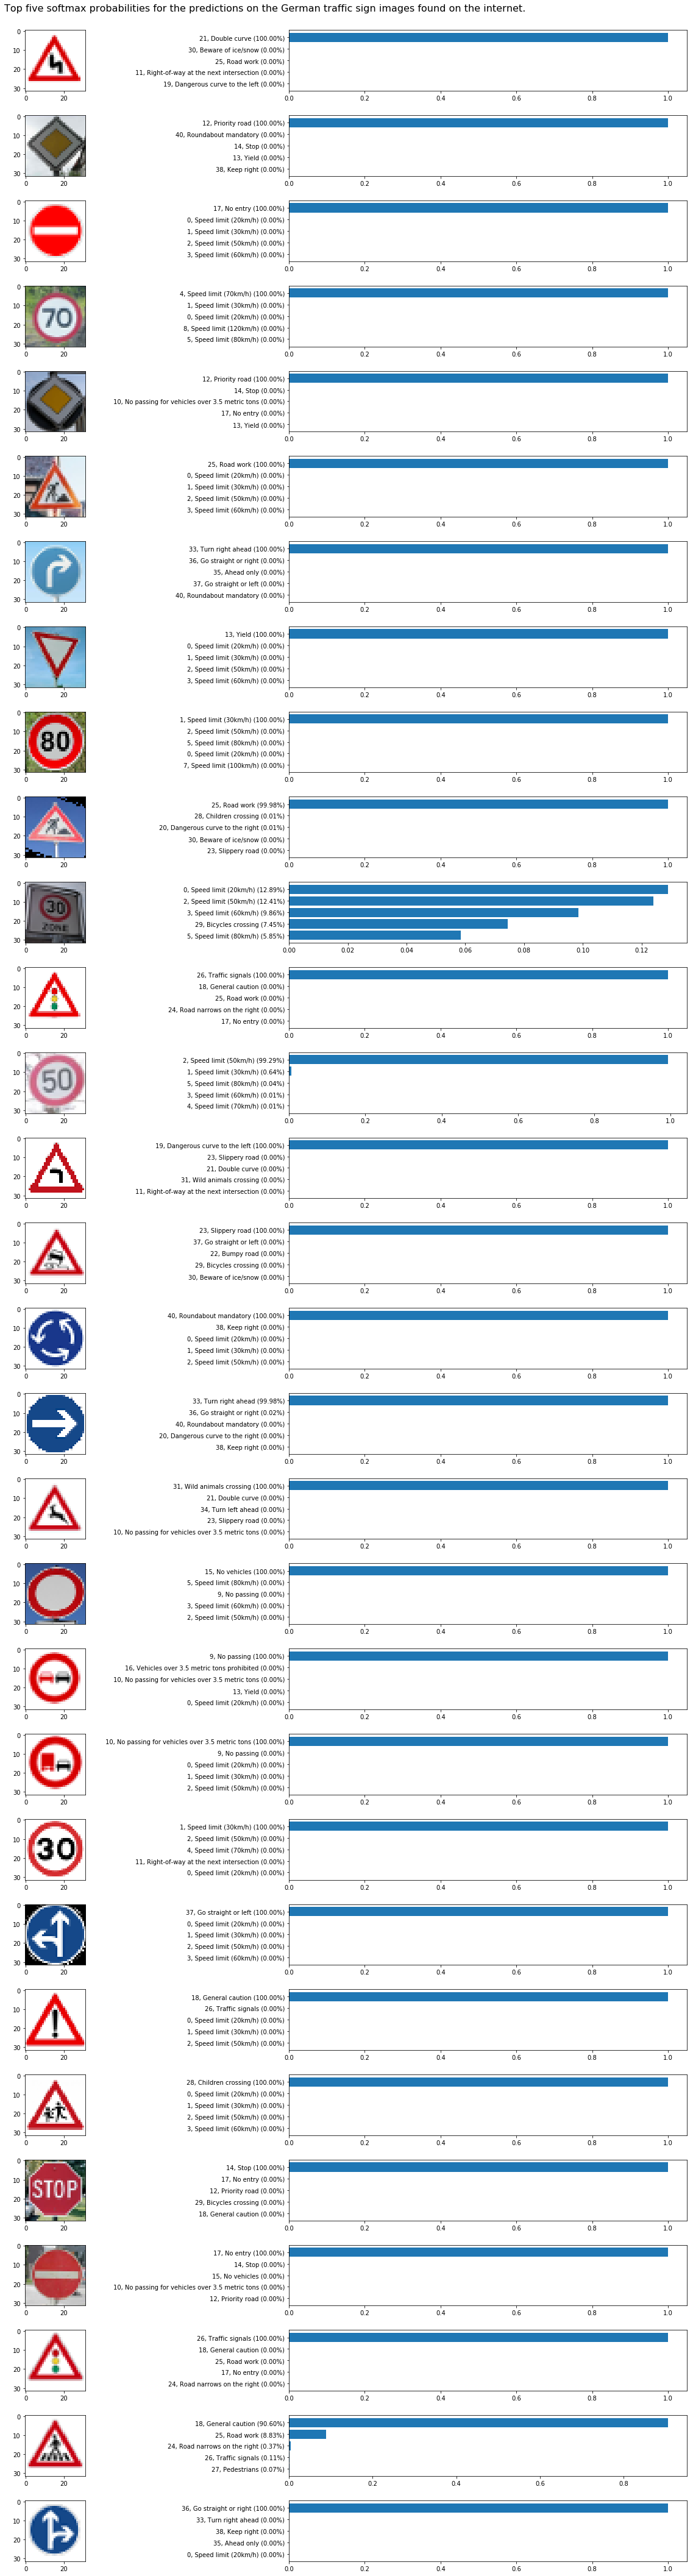

In [21]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

signnames_labelIDs = []
signnames_labels = []

# Save sign labels and names to lists
with open('signnames.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            signnames_labelIDs.append(int(row[0]))
            signnames_labels.append(row[1])
            line_count += 1


softmax_logits = tf.nn.softmax(logits)
k = 5
top_k = tf.nn.top_k(softmax_logits, k=k)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    newimg_softmax_logits = sess.run(softmax_logits, feed_dict={x: X_newimg, keep_prob: 1.0})
    newimg_top_k = sess.run(top_k, feed_dict={x: X_newimg, keep_prob: 1.0})

    fig, ax = plt.subplots(len(X_newimg), 2, figsize=(20, 60))
    fig.tight_layout(pad=2.0)
    fig.suptitle('Top five softmax probabilities for the predictions on the German traffic sign images found on the internet.', fontsize=16)
    fig.subplots_adjust(top=0.97)
    ax = ax.ravel()
    
    labels = []
    widths = []
    
    for i in range(0, len(X_newimg)): 
        ax[i*2].imshow(X_newimg[i])

        for j in range(len(newimg_top_k[0][0])-1, -1, -1):
            labels.append(str(newimg_top_k[1][i][j]) + str(', ') + 
                          str(signnames_labels[newimg_top_k[1][i][j]]) + str(' (') + 
                          str('{:0.2f}'.format(100*newimg_top_k[0][i][j])) + str('%)'))
            widths.append(newimg_top_k[0][i][j])

        ax[i*2+1].barh(labels, widths, align='center')
    
        labels = []
        widths = []

##### Reference
#         print(len(newimg_top_k[0][0])) # Number of softmax probabilities per image.
#         print(newimg_top_k[1][0][i]) # Label ID
#         print(newimg_top_k[0][0][i]) # Probability
#         print(signnames_labels[newimg_top_k[1][0][i]]) # Label Name

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


Original Image


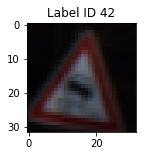

In [22]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

# image_input = image
img_index = random.randint(0, len(X_train)-1)
image_input = X_train[img_index]
image_input = np.array(image_input).reshape(1, 32, 32, 3)

# Note: that to get access to tf_activation, the session should be interactive which can be achieved with the following commands.
sess = tf.InteractiveSession()
sess.as_default()
init = tf.global_variables_initializer()
sess.run(init)

# Show original image
fig, ax = plt.subplots(1, 1, figsize=(2,2))
ax.imshow(X_train[img_index])
ax.set_title('Label ID ' + str(y_train[index]))

print('Original Image')

Feature map of the first activation layer (first convolution layer)


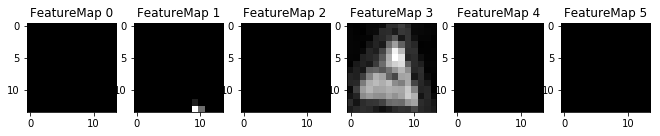

In [23]:
print('Feature map of the first activation layer (first convolution layer)')

outputFeatureMap(image_input, tf_activation1, activation_min=-1, activation_max=-1 ,plt_num=1)


Feature map of the second activation layer (second convolution layer)


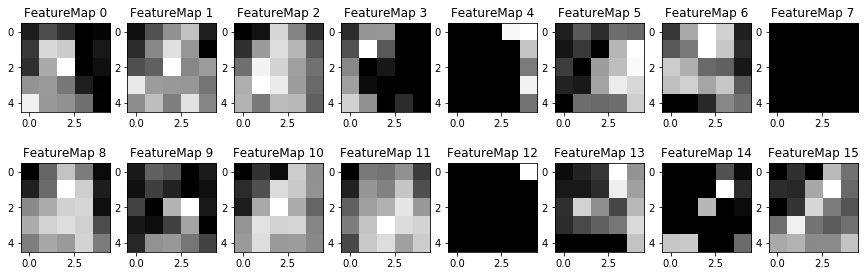

In [24]:
print('Feature map of the second activation layer (second convolution layer)')

outputFeatureMap(image_input, tf_activation2, activation_min=-1, activation_max=-1 ,plt_num=1)
